In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [2]:
import os
# change python directory to /home/gmh4/projects/CompLab/comp-lab-class
os.chdir('/home/jh8862/theory-lab/comp-lab-2023/Week7/Analysis')

In [3]:
crystal = md.load("../Inputs/1UBQ.pdb")
colabfold = md.load("../Inputs/1UBQalpha_7686d_0/1UBQalpha_7686d_0_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb")
greenealpha = md.load("../Inputs/1UBQ/unrelaxed_model_1_pred_0.pdb")

In [4]:
chain0 = crystal.top.select('chainid 0')

In [5]:
crystal_select = crystal.atom_slice(chain0)

In [6]:
not_oxt = crystal_select.top.select('index 0 to 600')

In [7]:
crystal_selected = crystal_select.atom_slice(not_oxt)

In [8]:
aligned_colab = colabfold.superpose(crystal_selected)

In [9]:
aligned_greene = greenealpha.superpose(crystal_selected)

In [10]:
aligned_colab.save("aligned_colabfold_traj.pdb")

In [11]:
aligned_greene.save("aligned_greenealpha_traj.pdb")

In [ ]:
#Calculate RMSD of alpha carbons

In [12]:
CA_crystal = crystal_selected.top.select("name CA")

In [13]:
rmsd_CA_crystal_colab = md.rmsd(crystal_selected, aligned_colab, atom_indices=CA_crystal)

In [14]:
rmsd_CA_crystal_greene = md.rmsd(crystal_selected, aligned_greene, atom_indices=CA_crystal)

In [ ]:
#Calculate RMSD of backbone

In [15]:
backbone_crystal = crystal_selected.top.select("is_backbone")

In [16]:
rmsd_bb_crystal_colab = md.rmsd(crystal_selected, aligned_colab, atom_indices=backbone_crystal)

In [17]:
rmsd_bb_crystal_greene = md.rmsd(crystal_selected, aligned_greene, atom_indices=backbone_crystal)

In [ ]:
#Calculate RMSD of side chain

In [18]:
side_crystal = crystal_selected.top.select("is_sidechain")
rmsd_sc_crystal_colab = md.rmsd(crystal_selected, aligned_colab, atom_indices=side_crystal)
rmsd_sc_crystal_greene = md.rmsd(crystal_selected, aligned_greene, atom_indices=side_crystal)

In [ ]:
#plot bar plot

In [31]:
categories = ["Alpha Carbon", "Backbone", "Side Chain"]
colab = [rmsd_CA_crystal_colab[0], rmsd_bb_crystal_colab[0], rmsd_sc_crystal_colab[0]]
greene = [rmsd_CA_crystal_greene[0], rmsd_bb_crystal_greene[0], rmsd_sc_crystal_greene[0]]
x = np.array([0, 1, 2])

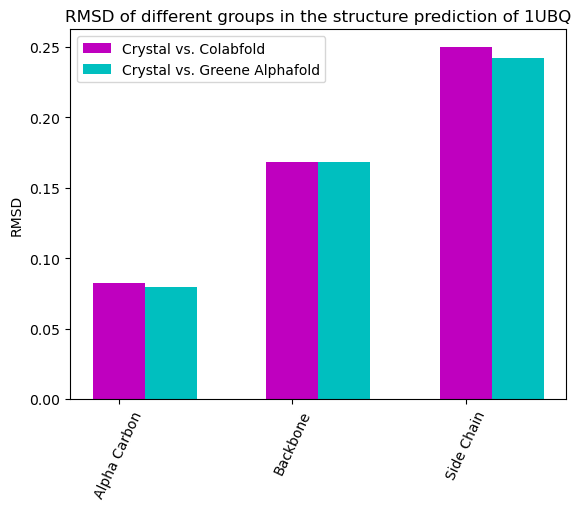

In [43]:
fig, ax = plt.subplots()
ax.bar(x, colab, width=0.3, color="m", label='Crystal vs. Colabfold', align='center')
ax.bar(x + 0.3, greene, width=0.3, color="c", label='Crystal vs. Greene Alphafold', align='center')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=65)
ax.legend()

plt.ylabel("RMSD")
plt.title("RMSD of different groups in the structure prediction of 1UBQ")
plt.savefig("../Figures/RMSD_CA_backbone_sidechain.jpg", dpi=300, bbox_inches="tight")
plt.show()